In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

from get_the_dataset import get_iris, get_breast_cancer
from query_by_committee import query_active_learning
from uncertainty_sampling_s1 import uncertainty_sampling_func
from expected_error_reduction import active_learning_with_eer
from random_sampling_al import run_random_sampling, plot_learning_curves

## Random Sampling

### Dataset-1: Breast Cancer

In [25]:
X, y = get_breast_cancer()

In [26]:
metrics_history_1 = run_random_sampling(
    X, y, batch_size=1, max_iterations=15)

Iteration 0, Metrics: {'accuracy': 0.9649122807017544, 'precision': 0.9649122807017544, 'recall': 0.9649122807017544, 'f1': 0.9649122807017544, 'iteration': 0, 'labeled_samples': 46}, Labeled samples: 46
Iteration 1, Metrics: {'accuracy': 0.9649122807017544, 'precision': 0.9649122807017544, 'recall': 0.9649122807017544, 'f1': 0.9649122807017544, 'iteration': 1, 'labeled_samples': 47}, Labeled samples: 47
Iteration 2, Metrics: {'accuracy': 0.956140350877193, 'precision': 0.9564878104351788, 'recall': 0.956140350877193, 'f1': 0.9562368871555263, 'iteration': 2, 'labeled_samples': 48}, Labeled samples: 48
Iteration 3, Metrics: {'accuracy': 0.9385964912280702, 'precision': 0.938457254246728, 'recall': 0.9385964912280702, 'f1': 0.9384499917007656, 'iteration': 3, 'labeled_samples': 49}, Labeled samples: 49
Iteration 4, Metrics: {'accuracy': 0.956140350877193, 'precision': 0.9560881370091896, 'recall': 0.956140350877193, 'f1': 0.9560357083576898, 'iteration': 4, 'labeled_samples': 50}, Label

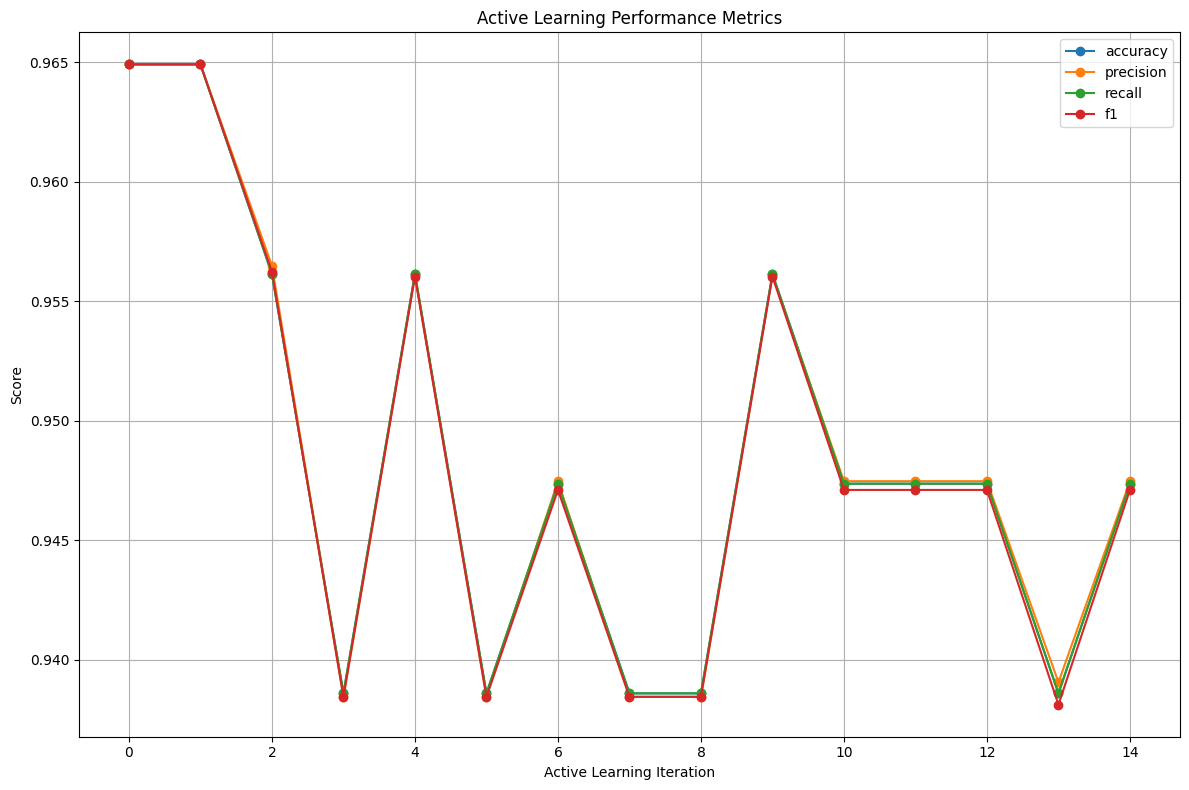

In [27]:
plot_learning_curves(metrics_history_1)

### Dataset-2: IRIS

In [28]:
X, y = get_iris()

In [29]:
metrics_history_2 = run_random_sampling(
    X, y, batch_size=1, max_iterations=15)

Iteration 0, Metrics: {'accuracy': 0.9, 'precision': 0.925, 'recall': 0.9, 'f1': 0.899248120300752, 'iteration': 0, 'labeled_samples': 13}, Labeled samples: 13
Iteration 1, Metrics: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'iteration': 1, 'labeled_samples': 14}, Labeled samples: 14
Iteration 2, Metrics: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'iteration': 2, 'labeled_samples': 15}, Labeled samples: 15
Iteration 3, Metrics: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'iteration': 3, 'labeled_samples': 16}, Labeled samples: 16
Iteration 4, Metrics: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'iteration': 4, 'labeled_samples': 17}, Labeled samples: 17
Iteration 5, Metrics: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'iteration': 5, 'labeled_samples': 18}, Labeled samples: 18
Iteration 6, Metrics: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'iteration': 6, 'labeled_samples': 1

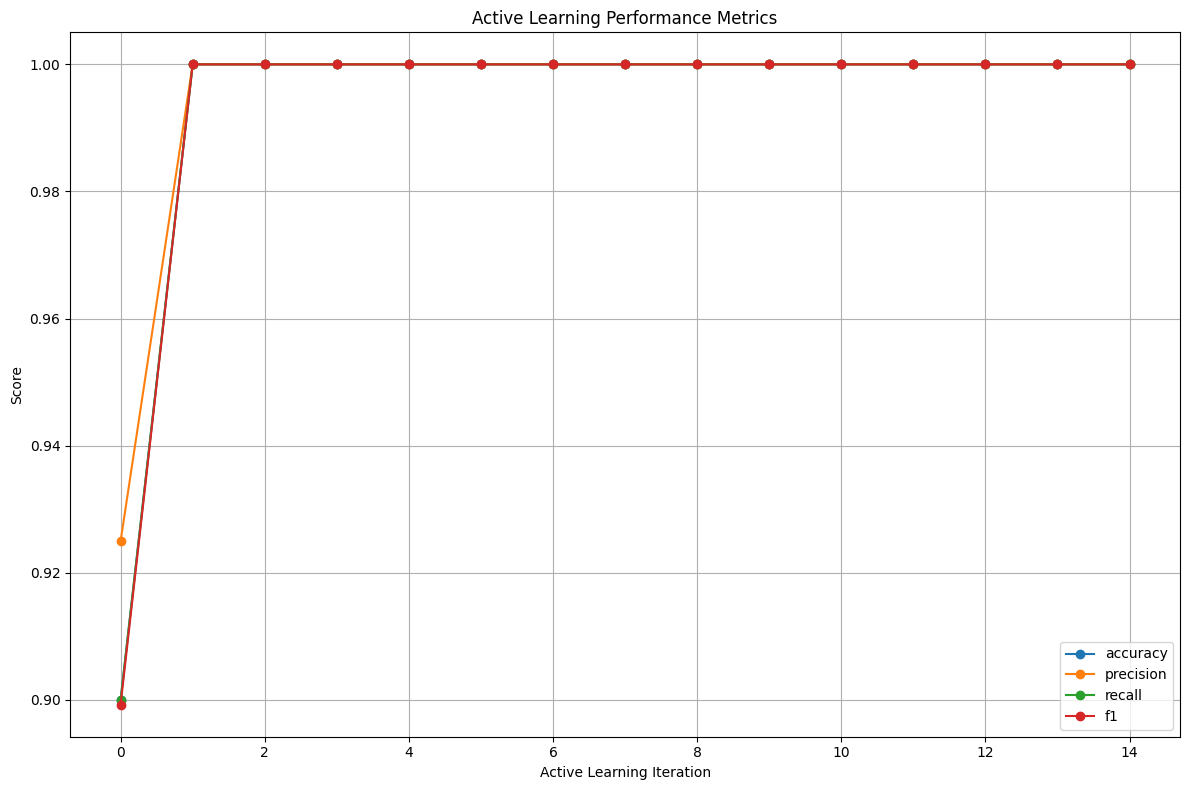

In [30]:
plot_learning_curves(metrics_history_2)

## Query by Committee

### Dataset-1: Breast Cancer

In [40]:
X, y = get_breast_cancer()

In [41]:
metrics_history_3 = query_active_learning(X, y) 

In [43]:
metrics_history_3

([0.9021739130434783,
  0.8913043478260869,
  0.9130434782608695,
  0.9021739130434783,
  0.9021739130434783,
  0.9021739130434783,
  0.8913043478260869,
  0.9021739130434783,
  0.9021739130434783,
  0.8913043478260869,
  0.9021739130434783,
  0.9239130434782609,
  0.9130434782608695,
  0.9456521739130435,
  0.9456521739130435,
  0.9347826086956522,
  0.9347826086956522,
  0.9239130434782609,
  0.9239130434782609,
  0.9347826086956522,
  0.9239130434782609],
 [{'accuracy': 0.9021739130434783,
   'precision': 0.9044644344494419,
   'recall': 0.9021739130434783,
   'f1': 0.9003131256095682},
  {'accuracy': 0.8913043478260869,
   'precision': 0.8918653576437588,
   'recall': 0.8913043478260869,
   'f1': 0.8897192028985507},
  {'accuracy': 0.9130434782608695,
   'precision': 0.9128170289855071,
   'recall': 0.9130434782608695,
   'f1': 0.9124628748799715},
  {'accuracy': 0.9021739130434783,
   'precision': 0.9044644344494419,
   'recall': 0.9021739130434783,
   'f1': 0.9003131256095682},
 

In [42]:
# Plot metrics history
plt.figure(figsize=(12, 6))
metrics_names = ['accuracy', 'precision', 'recall', 'f1']
for metric in metrics_names:
    plt.plot([m[metric] for m in metrics_history_3], label=metric.capitalize())
plt.xlabel('Number of queries')
plt.ylabel('Score')
plt.title('Performance Metrics Over Time')
plt.legend()
plt.grid(True)
plt.show()

TypeError: list indices must be integers or slices, not str

<Figure size 1200x600 with 0 Axes>

### Dataset-2: Iris

In [6]:
X, y = get_iris()

In [7]:
performance_history, metrics_history = query_active_learning(X, y) 

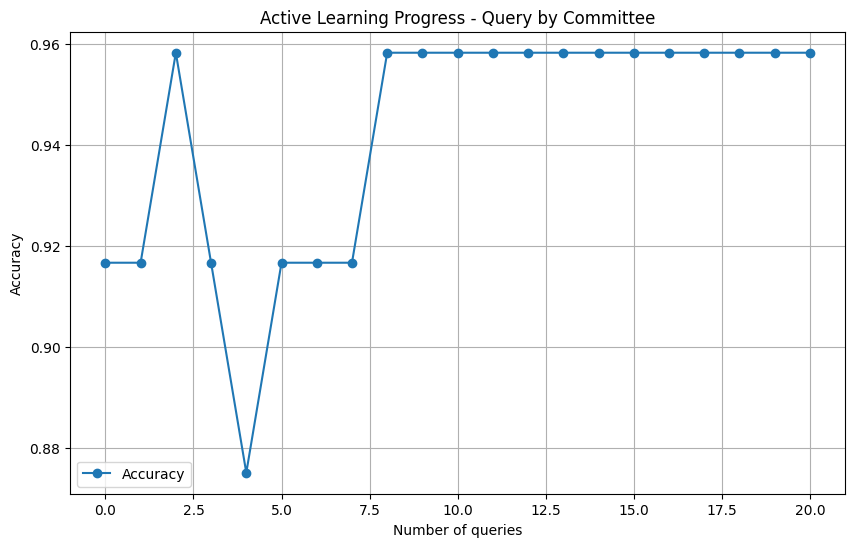

In [8]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(len(performance_history)), performance_history, marker='o', label='Accuracy')
plt.xlabel('Number of queries')
plt.ylabel('Accuracy')
plt.title('Active Learning Progress - Query by Committee')
plt.legend()
plt.grid(True)
plt.show()

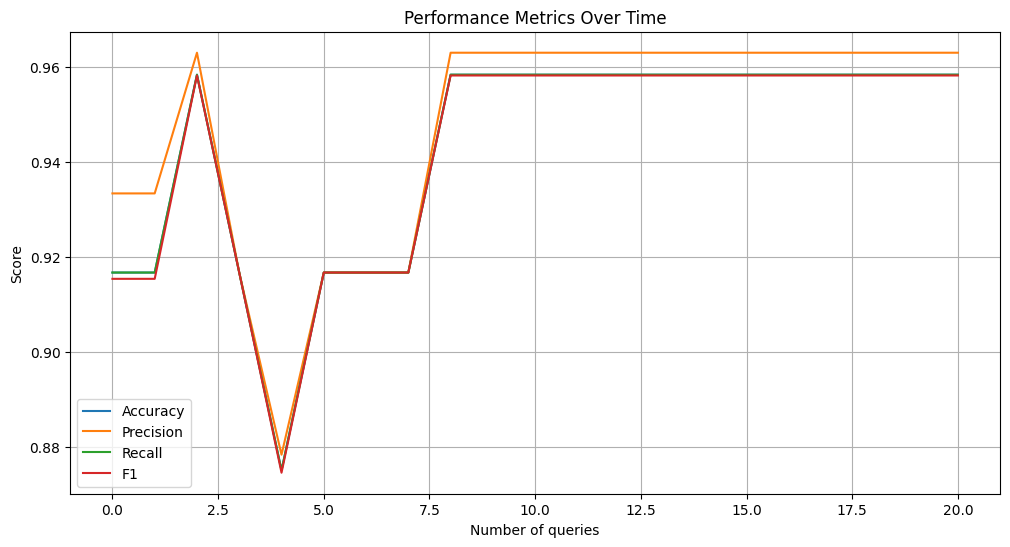

In [9]:
# Plot metrics history
plt.figure(figsize=(12, 6))
metrics_names = ['accuracy', 'precision', 'recall', 'f1']
for metric in metrics_names:
    plt.plot([m[metric] for m in metrics_history], label=metric.capitalize())
plt.xlabel('Number of queries')
plt.ylabel('Score')
plt.title('Performance Metrics Over Time')
plt.legend()
plt.grid(True)
plt.show()

## Uncertainty Sampling

### Dataset-1: Breast Cancer

In [10]:
X, y = get_breast_cancer()

In [11]:
accuracy_list = uncertainty_sampling_func(X, y)

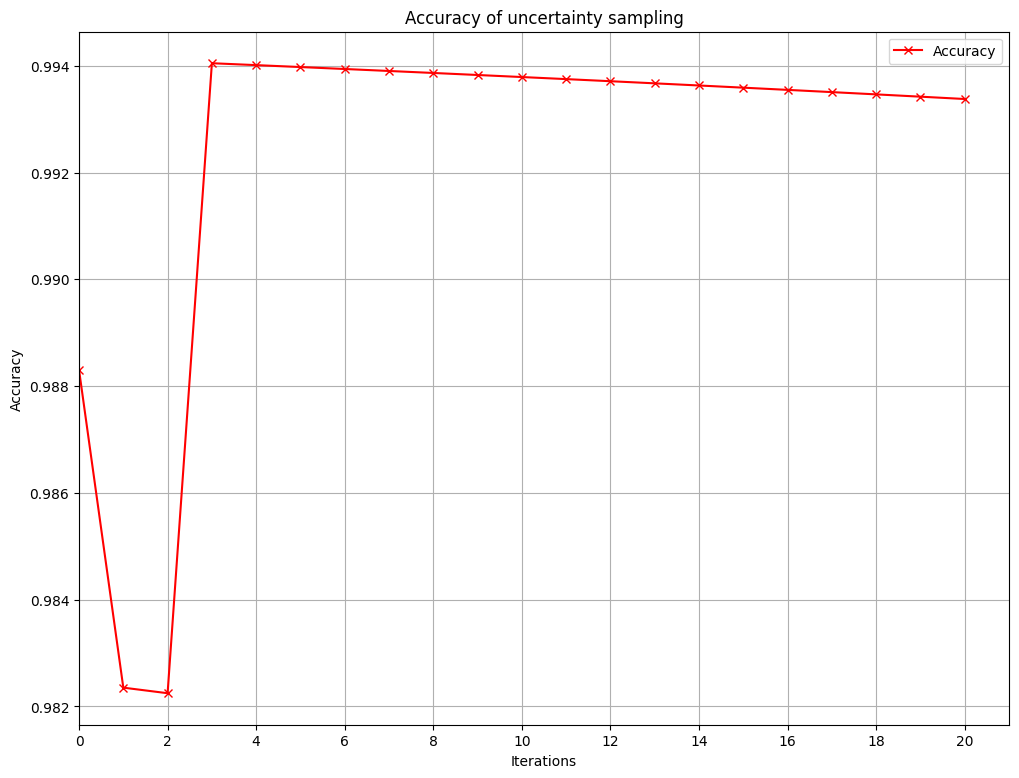

In [12]:
plt.figure(figsize=(12, 9))
plt.plot(range(len(accuracy_list)), accuracy_list, marker='x', label='Accuracy', color='red')
plt.title("Accuracy of uncertainty sampling")
plt.xlabel("Iterations")
plt.xticks(range(0, 21, 2))
plt.xlim((0, 21))
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

### Dataset-2: Iris

In [13]:
X, y = get_iris()

In [14]:
accuracy_list = uncertainty_sampling_func(X, y)

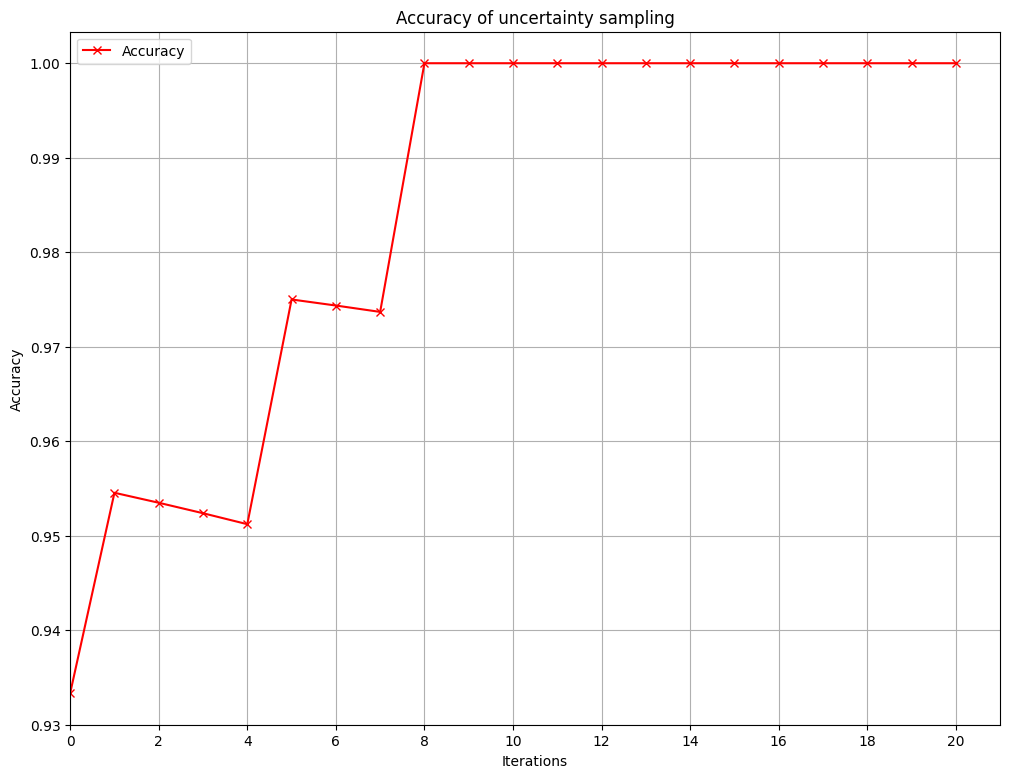

In [15]:
plt.figure(figsize=(12, 9))
plt.plot(range(len(accuracy_list)), accuracy_list, marker='x', label='Accuracy', color='red')
plt.title("Accuracy of uncertainty sampling")
plt.xlabel("Iterations")
plt.xticks(range(0, 21, 2))
plt.xlim((0, 21))
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

## Expected Error Reduction

### Dataset-1: Breast Cancer

In [2]:
X, y = get_breast_cancer()

In [3]:
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
results = active_learning_with_eer(base_model, X, y, n_initial=10, n_queries=7)

Initial accuracy: 0.895

Query 1/7...
Done in 138.30s | Accuracy: 0.889

Query 2/7...
Done in 131.54s | Accuracy: 0.895

Query 3/7...
Done in 124.81s | Accuracy: 0.895

Query 4/7...
Done in 126.39s | Accuracy: 0.912

Query 5/7...
Done in 126.65s | Accuracy: 0.918

Query 6/7...
Done in 115.12s | Accuracy: 0.901

Query 7/7...
Done in 122.28s | Accuracy: 0.906


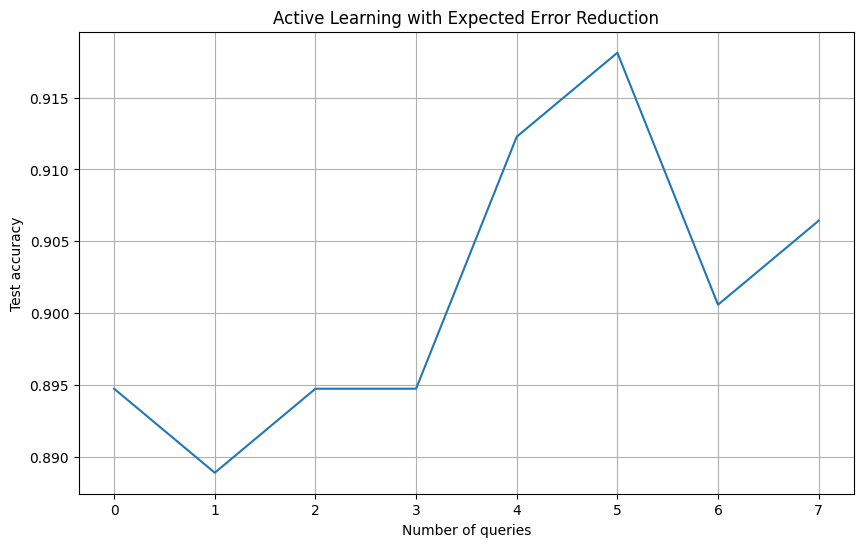

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(results['performance_history'])), results['performance_history'])
plt.xlabel('Number of queries')
plt.ylabel('Test accuracy')
plt.title('Active Learning with Expected Error Reduction')
plt.grid(True)
plt.show()

### Dataset-2: Iris

In [9]:
X, y = get_iris()

In [10]:
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
results = active_learning_with_eer(base_model, X, y, n_initial=10, n_queries=10)

Initial accuracy: 0.889

Query 1/10...
Done in 51.67s | Accuracy: 0.867

Query 2/10...
Done in 46.13s | Accuracy: 0.889

Query 3/10...
Done in 43.95s | Accuracy: 0.867

Query 4/10...
Done in 45.81s | Accuracy: 0.889

Query 5/10...
Done in 40.82s | Accuracy: 0.889

Query 6/10...
Done in 38.86s | Accuracy: 0.867

Query 7/10...
Done in 43.35s | Accuracy: 0.844

Query 8/10...
Done in 42.46s | Accuracy: 0.844

Query 9/10...
Done in 41.61s | Accuracy: 0.867

Query 10/10...
Done in 44.44s | Accuracy: 0.889


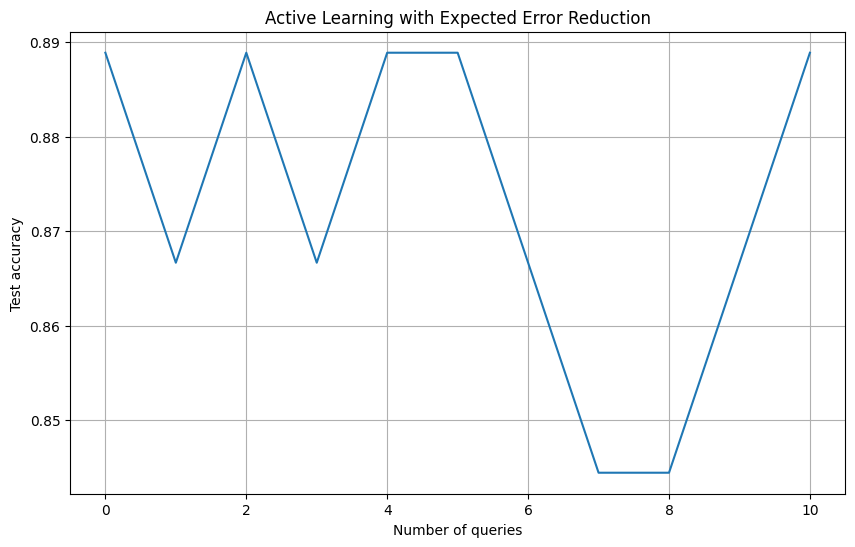

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(results['performance_history'])), results['performance_history'])
plt.xlabel('Number of queries')
plt.ylabel('Test accuracy')
plt.title('Active Learning with Expected Error Reduction')
plt.grid(True)
plt.show()